In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# We want to use the latest version of Seaborn (0.9.0) but an older version is
# installed on Colab. Run this cell only once to install the right version.
!pip install seaborn==0.9.0
import seaborn as sns 

##Introduction
---
The power utility data collection website https://www.eia.gov/electricity/data/eia861/ provides an annual summary of the operational data collected from various power utilities across Northern America. This data has many fields describing each power utility entity:
1. *Utility Characteristics (State, NERC Region, Ownership Type etc)*
2. *Demand (Summer and Winter Peak Load)*
3. *Energy Sources*
4. *Dispostion (Total Energy Losses)*
5. *Electric Revenue (Retail Sales)*

I plan to use this annual summary data to test for any significant changes in key areas which are essential for the power utility operations managements and future projections. These are
1. Summer Peak Load and Winter Peak Load
2. Percentage Total Energy Losses
3. Retail Sale Per Unit
4. Total Energy Supplied

The main objective of this study is to provide insights using numerical data that can reflect important trends that are essential for the power utility sector.


In [0]:
# URL for the 2018 Table 
url = 'https://raw.githubusercontent.com/abhishek-verma-26/flashback/master/Operational_Data_2018.csv'
power_summary_2018 = pd.read_csv(url)

# URL for the 2012 Table 
url = 'https://raw.githubusercontent.com/abhishek-verma-26/flashback/master/Operational_Data_2012.csv'
power_summary_2012 = pd.read_csv(url)

# Merged dataset 
power_summary_merged = pd.concat([power_summary_2012, power_summary_2018],sort=False)
power_summary_merged.head()


,Data Year,Utility Number,Utility Name,State,Ownership Type,NERC Region,Summer Peak Demand,Winter Peak Demand,Net Generation,Wholesale Power Purchases,Exchange Energy Received,Exchange Energy Delivered,Net Power Exchanged,Wheeled Power Received,Wheeled Power Delivered,Net Wheeled Power,Transmission by Other Losses,Total Sources,Retail Sales,Sales for Resale,Furnished without Charge,Consumed by Respondent without Charge,Total Energy Losses,Total Disposition,From Retail Sales,From Delivery Customers,From Sales for Resale,From Credits or Adjustments,From Transmission,From Other,Total,Data Type\nO = Observed\nI = Imputed,Data Type\r\nO = Observed\r\nI = Imputed
0,2012,55,City of Aberdeen - (MS),MS,Municipal,SERC,30.0,33.0,0,"199,363",.,.,.,.,.,.,.,"199,363","192,494",0,.,38,"6,831","199,363","14,985.0",.,.,0.0,.,221.0,"15,206.0",O,NaN
1,2012,59,City of Abbeville - (LA),LA,Municipal,SPP,34.0,22.0,.,"143,515",.,.,0,.,.,0,.,"143,515","132,321",.,.,.,"11,194","143,515","13,528.0",.,.,.,.,.,"13,528.0",O,NaN
2,2012,84,A & N Electric Coop,VA,Cooperative,RFC,166.9,139.0,"-10,206","679,406",0,0,0,0,0,0,0,"669,200","649,817",0,0,"1,073","18,310","669,200","70,115.7",0.0,0.0,.,0.0,.,"70,115.7",O,NaN
3,2012,97,Adams Electric Coop,IL,Cooperative,SERC,38.6,31.8,"5,040","166,900",.,.,0,.,.,0,.,"171,940","159,105",.,.,329,"12,506","171,940","19,875.0",.,.,.,.,230.0,"20,105.0",O,NaN
4,2012,108,Adams-Columbia Electric Coop,WI,Cooperative,MRO,149.1,81.1,.,"524,397",.,.,0,.,.,0,.,"524,397","491,010",78,.,"1,084","32,225","524,397","58,880.0",.,5.0,.,.,565.0,"59,450.0",O,NaN


In my analysis, I will categorize the data into three different  domains of 1) ownership type, 2) NERC region and 3) states. I use this to visualize the distribution differences in various sub categories and to better judge a generalized trends. 


In [0]:
print("Number of Data points under each ownership Type")
pd.crosstab(power_summary_merged['Ownership Type'],power_summary_merged['Data Year'])

Number of Data points under each ownership Type


Data Year,2012,2018
Ownership Type,,
Behind the Meter,0,15
Community Choice Aggregator,0,19
Cooperative,812,806
Federal,8,8
Investor Owned,179,168
Municipal,828,830
Municipal Mktg Authority,19,15
Political Subdivision,100,104
Retail Power Marketer,175,272


In [0]:
print("Number of Data points under each NERC Region")
pd.crosstab(power_summary_merged['NERC Region'],power_summary_merged['Data Year'])

Number of Data points under each NERC Region


Data Year,2012,2018
NERC Region,,
AK,25,23
ECAR,0,1
ERCOT,0,4
FRCC,40,40
HI,3,3
HICC,1,1
MISO,0,52
MRO,406,351
NPCC,121,116


In [0]:
print("Number of Data points under each State")
pd.crosstab(power_summary_merged['State'],power_summary_merged['Data Year'])

Number of Data points under each State


Data Year,2012,2018
State,,
AK,24,23
AL,54,52
AR,29,29
AZ,24,25
CA,64,91
CN,3,16
CO,40,40
CT,24,34
DC,1,3


## Hypothesis Testing


---




**I propose the following hypothesis testing based on the data:**
1. To test the hypothesis of significant difference (alternative) in Summer Peak Load and Winter Peak Load distribution experienced by various entities during the 2018 year.

**Ho**: There is no significant difference between the summer peak load and winter peak load of year 2018

**Ha**:  There is a significant difference between the summer peak load and winter peak load of year 2018

2. To test the hypothesis of significant difference in 1) Percentage Total Energy Losses, 2) Retail Sale per Unit and 3) Total Sources (Mega Watt Hour electricity) between year 2012 and 2018

**Ho**: There is no significant difference between (Total Energy Losses, Retail Sale per unit, Total Sources) of year 2012 and 2018

**Ha**:  There is a significant difference between (Total Energy Losses, Retail Sale per unit, Total Sources) of year 2012 and 2018




###1) Summer Peak Demand & Winter Peak Demand

The summer peak and winter peak columns were read as two dataframe. Two necessary selections were made to the columns
1. omit null fields and (.) 
2. remove commas in the values and replace to float type. 

In [0]:
summer_df = power_summary_2018[(power_summary_2018['Summer Peak Demand'] != '.')]
winter_df = power_summary_2018[(power_summary_2018['Winter Peak Demand'] != '.')]
summer_df = summer_df.assign(Summer_Peak_Demand_Trim = summer_df['Summer Peak Demand'].str.replace(",", "").astype(float))
winter_df = winter_df.assign(Winter_Peak_Demand_Trim = winter_df['Winter Peak Demand'].str.replace(",", "").astype(float))

When plotting the summer and winter demand we find the distributions to be a consistent among various ownership. However, the distribution across the State, Federal, Investor Owned and Transmission seems to carry subtle difference. Also, we find that most of ownership demand lie in the 0 - 5000 Megawatt range.

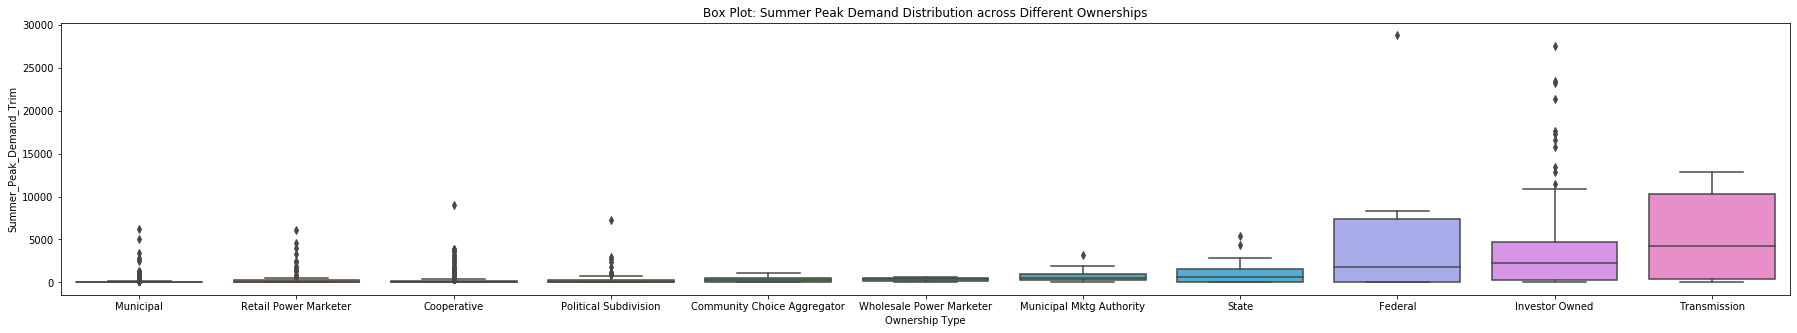

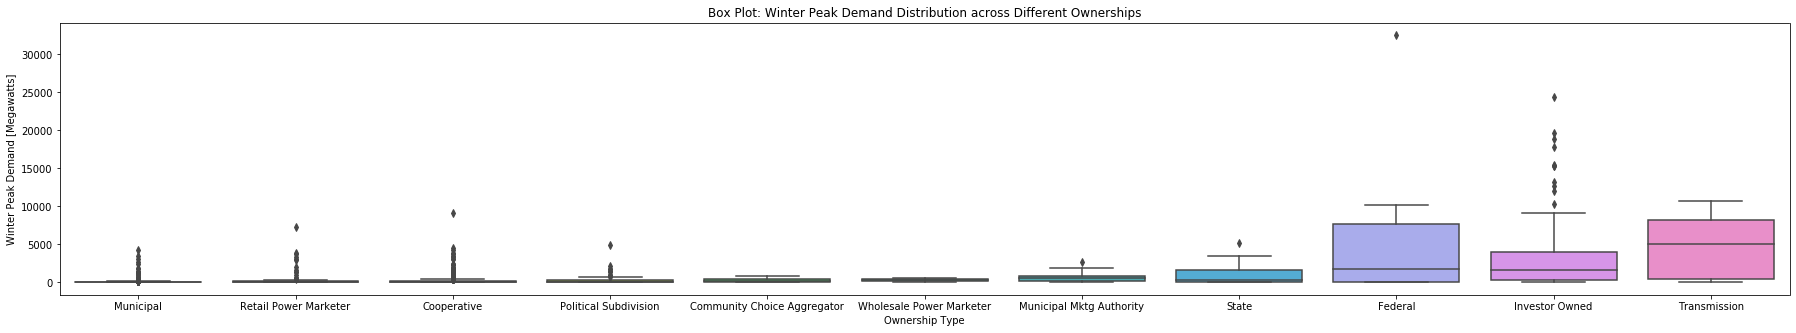

In [0]:
summer_sorted = summer_df.groupby(['Ownership Type'])['Summer_Peak_Demand_Trim'].median().sort_values(ascending=True)  

plt.figure(figsize = (31,5))
plt.xlabel('Ownership Type')
plt.ylabel('Summer Peak Demand [Megawatts]')
plt.title('Box Plot: Summer Peak Demand Distribution across Different Ownerships')
ax = sns.boxplot(y="Summer_Peak_Demand_Trim", x="Ownership Type",data=summer_df, order = summer_sorted.index)
plt.show()

plt.figure(figsize = (31,5))
ax = sns.boxplot(y="Winter_Peak_Demand_Trim", x="Ownership Type",data=winter_df,  order = summer_sorted.index)
plt.xlabel('Ownership Type')
plt.ylabel('Winter Peak Demand [Megawatts]')
plt.title('Box Plot: Winter Peak Demand Distribution across Different Ownerships')
plt.show()

To further evaluate, I check the distribution of data points among ownership types. Its is found from the table listed below that "Cooperative" and "Municipal" ownership accounts for 80% of the data points.
The distibution among these two ownership should represent the overall characteristics.

In [0]:
print("Number of Data points under each ownership Type")
pd.crosstab(summer_df['Ownership Type'],summer_df['Data Year'])

Number of Data points under each ownership Type


Data Year,2018
Ownership Type,
Community Choice Aggregator,18
Cooperative,804
Federal,7
Investor Owned,157
Municipal,825
Municipal Mktg Authority,15
Political Subdivision,97
Retail Power Marketer,78
State,16


Looking at the peak load distribution for the two ownership category, many outlier values beyond 1000 are found. If the peak demand is limited to 1000, we drop roughly 2.5% of data points. Using visualization of histograms, and statistical values, I find the distribution to be non-paramteric (non-normal) .

Statistics without limiting data
DescribeResult(nobs=1629, minmax=(1.0, 9043.0), mean=158.74782074892573, variance=206563.87607172213, skewness=9.660591800793666, kurtosis=132.6859182437018)
DescribeResult(nobs=1629, minmax=(0.0, 9125.0), mean=161.2117249846532, variance=201607.99329610122, skewness=9.210201564369926, kurtosis=126.67408313150239)
Statistics with Peak load less than 1000 Megawatt
DescribeResult(nobs=1586, minmax=(1.0, 981.3), mean=100.65807061790669, variance=18624.436669839804, skewness=3.036930592721789, kurtosis=10.99148993141145)
DescribeResult(nobs=1585, minmax=(0.0, 976.0), mean=102.53495268138799, variance=20688.98962349839, skewness=3.0147091575831317, kurtosis=10.817774758061256)


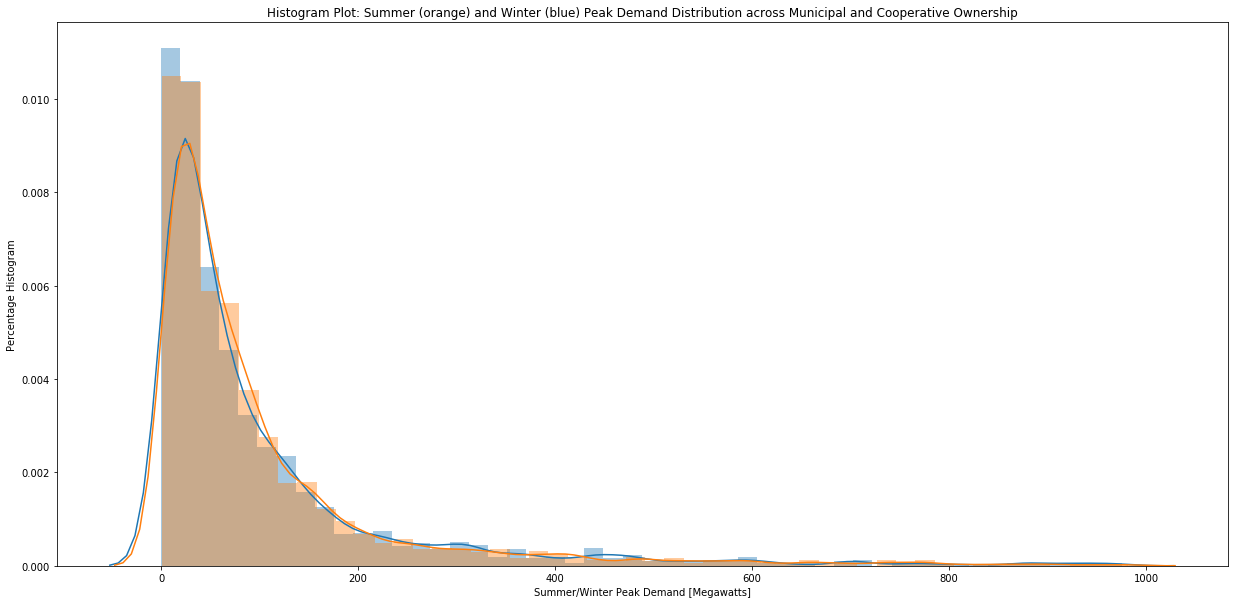

In [0]:
summer_major_df = summer_df[(summer_df['Ownership Type'] == 'Cooperative') | (summer_df['Ownership Type'] == 'Municipal')]
winter_major_df = winter_df[(winter_df['Ownership Type'] == 'Cooperative') | (winter_df['Ownership Type'] == 'Municipal')]

# Statistics to describe characteristic of the distribution
print("Statistics without limiting data")
print(stats.describe(summer_major_df['Summer_Peak_Demand_Trim']))
print(stats.describe(winter_major_df['Winter_Peak_Demand_Trim']))

# Statistics to describe characteristic of the distribution
print("Statistics with Peak load less than 1000 Megawatt")
print(stats.describe(summer_major_df[summer_major_df['Summer_Peak_Demand_Trim'] < 1000]['Summer_Peak_Demand_Trim']))
print(stats.describe(winter_major_df[winter_major_df['Winter_Peak_Demand_Trim'] < 1000]['Winter_Peak_Demand_Trim']))


# Plotting histrogram 
plt.figure(figsize = (21,10))
plt.ylabel('Percentage Histogram')
plt.title('Histogram Plot: Summer (orange) and Winter (blue) Peak Demand Distribution across Municipal and Cooperative Ownership')
sns.distplot(winter_major_df[winter_major_df['Winter_Peak_Demand_Trim'] < 1000]['Winter_Peak_Demand_Trim'])
sns.distplot(summer_major_df[summer_major_df['Summer_Peak_Demand_Trim'] < 1000]['Summer_Peak_Demand_Trim'])
plt.xlabel('Summer/Winter Peak Demand [Megawatts]')
plt.show()


Also, Looking at the distibution beyond the two major ownership we find a similar non-normal distribution of the peak load.



Statistics without limiting data
DescribeResult(nobs=825, minmax=(1.1, 6201.0), mean=106.82642424242422, variance=132492.10828149455, skewness=11.208167574644108, kurtosis=152.5702993861656)
DescribeResult(nobs=825, minmax=(0.0, 4230.0), mean=94.35551515151514, variance=86560.81963277436, skewness=8.989265815782568, kurtosis=96.49807510017473)
Statistics with Peak load less than 1000 Megawatt
DescribeResult(nobs=813, minmax=(1.1, 930.0), mean=71.71709717097171, variance=10844.925581710992, skewness=3.5770731258806987, kurtosis=16.672035469334105)
DescribeResult(nobs=813, minmax=(0.0, 927.0), mean=63.716236162361625, variance=9265.40229763874, skewness=3.85679473585628, kurtosis=19.968010740338073)


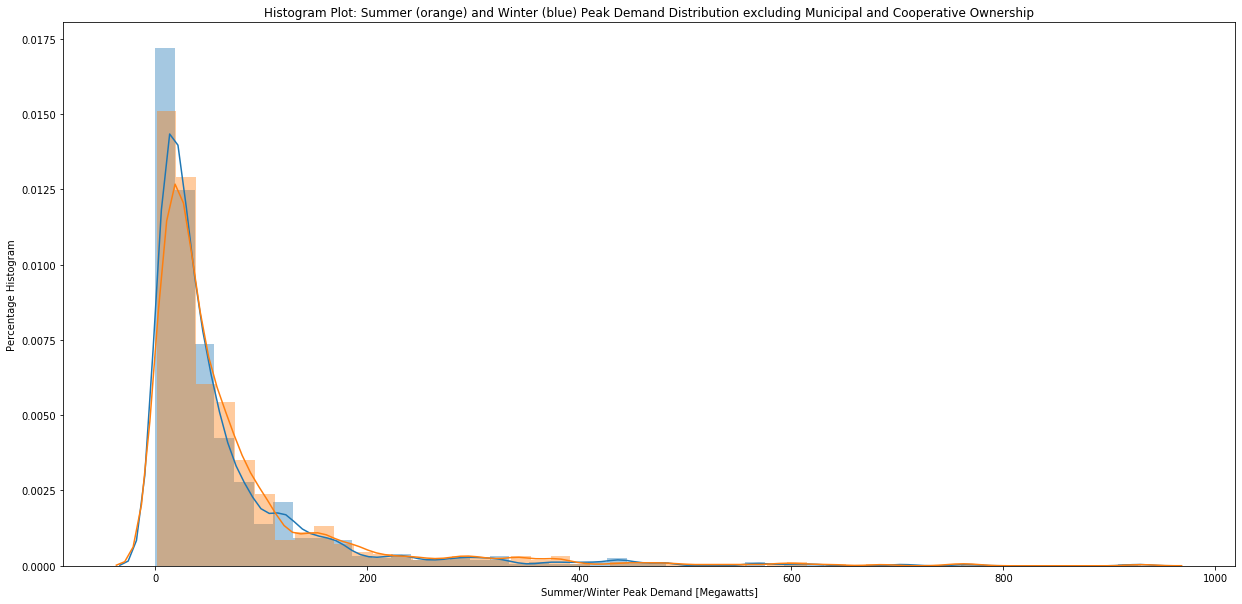

In [0]:
summer_minor_df = summer_df[(summer_df['Ownership Type'] != 'Cooperative') & (summer_df['Ownership Type'] == 'Municipal')]
winter_minor_df = winter_df[(winter_df['Ownership Type'] != 'Cooperative') & (winter_df['Ownership Type'] == 'Municipal')]

# Statistics to describe characteristic of the distribution
print("Statistics without limiting data")
print(stats.describe(summer_minor_df['Summer_Peak_Demand_Trim']))
print(stats.describe(winter_minor_df['Winter_Peak_Demand_Trim']))

# Statistics to describe characteristic of the distribution
print("Statistics with Peak load less than 1000 Megawatt")
print(stats.describe(summer_minor_df[summer_minor_df['Summer_Peak_Demand_Trim'] < 1000]['Summer_Peak_Demand_Trim']))
print(stats.describe(winter_minor_df[winter_minor_df['Winter_Peak_Demand_Trim'] < 1000]['Winter_Peak_Demand_Trim']))


# Plotting histrogram 
plt.figure(figsize = (21,10))
plt.ylabel('Percentage Histogram')
plt.title('Histogram Plot: Summer (orange) and Winter (blue) Peak Demand Distribution excluding Municipal and Cooperative Ownership')
sns.distplot(winter_minor_df[winter_minor_df['Winter_Peak_Demand_Trim'] < 1000]['Winter_Peak_Demand_Trim'])
sns.distplot(summer_minor_df[summer_minor_df['Summer_Peak_Demand_Trim'] < 1000]['Summer_Peak_Demand_Trim'])
plt.xlabel('Summer/Winter Peak Demand [Megawatts]')
plt.show()

Hence, I proceed with the wilcoxon signed rank test for non-normal distribution to test alternative hypothesis of significant difference in the summer and winter peak loads. 

1.   When testing with all data point, the test yields a lower p value of the order 10^-5 indicating a significant median difference in summer and winter peak loads
2.   When testing will just the "Municipal" and "Cooperative" only distribution, a higher p value of 0.7198 is calculated, which fails to reject the null hypothesis.
3.  When testing with distribution without "Municipal" and "Cooperative", a lower p value of order 10^-33 is achieved, indicating a significant difference in median

Therefore, based on the results above, I conclude that the test fails to **reject the null hypothesis.** 




In [0]:
summer_df = summer_df[(summer_df['Winter Peak Demand'] != '.')]
summer_df = summer_df.assign(Winter_Peak_Demand_Trim = summer_df['Winter Peak Demand'].str.replace(",", "").astype(float))

print(stats.wilcoxon((summer_df['Summer_Peak_Demand_Trim']-summer_df['Winter_Peak_Demand_Trim'])))
print(stats.wilcoxon((summer_major_df['Summer_Peak_Demand_Trim']-winter_major_df['Winter_Peak_Demand_Trim'])))
print(stats.wilcoxon((summer_minor_df['Summer_Peak_Demand_Trim']-winter_minor_df['Winter_Peak_Demand_Trim'])))

WilcoxonResult(statistic=878444.0, pvalue=2.341981478304446e-05)
WilcoxonResult(statistic=634565.5, pvalue=0.7198746757802981)
WilcoxonResult(statistic=84784.0, pvalue=8.588984351533339e-33)


Based on the above test results, I come to the conclusion that summer and winter peak load in 2018 year are not significantly different. I also conclude that the distribution behaviour is highly dependent on the ownership category it belongs to. To highlight this feature, I display a table for the median summer/winter peak load values under each ownership.

In [0]:
 summer_df.groupby(['Ownership Type'])['Summer_Peak_Demand_Trim','Winter_Peak_Demand_Trim'].median()

,Summer_Peak_Demand_Trim,Winter_Peak_Demand_Trim
Ownership Type,,
Community Choice Aggregator,247.5,143.90
Cooperative,82.4,88.40
Federal,1813.0,1708.00
Investor Owned,2206.0,1671.00
Municipal,36.7,32.40
Municipal Mktg Authority,497.4,618.10
Political Subdivision,99.0,100.70
Retail Power Marketer,59.6,53.25
State,582.2,355.50


###2a) Percentage Total Energy Loss 

---




I calculate PTEL or percentage total energy loss as 'Total Energy Losses' / 'Total Disposition'. I think this a key indicator of the operating efficiencies of power utility entities and I plan to analyse this by testing for the 2012 and 2018 year PTEL.

In [0]:
#PTLE for 2018
energyloss_2018_df = power_summary_2018[(power_summary_2018['Total Energy Losses'] != '.') & (power_summary_2018['Total Disposition'] != '.')]
energyloss_2018_df = energyloss_2018_df.assign(Total_Energy_Losses_Trim = energyloss_2018_df['Total Energy Losses'].str.replace(",", "").astype(int))
energyloss_2018_df = energyloss_2018_df.assign(Total_Disposition_Trim = energyloss_2018_df['Total Disposition'].str.replace(",", "").astype(int))
energyloss_2018_df = energyloss_2018_df.assign(Percentage_Losses = 100*energyloss_2018_df['Total_Energy_Losses_Trim']/energyloss_2018_df['Total_Disposition_Trim'])
energyloss_2018_df = energyloss_2018_df[(energyloss_2018_df['Percentage_Losses'].isnull() == False)]
#energyloss_2018_df.head()

#PTLE for 2012
energyloss_2012_df = power_summary_2012[(power_summary_2012['Total Energy Losses'] != '.') & (power_summary_2012['Total Disposition'] != '.')]
energyloss_2012_df = energyloss_2012_df.assign(Total_Energy_Losses_Trim = energyloss_2012_df['Total Energy Losses'].str.replace(",", "").astype(int))
energyloss_2012_df = energyloss_2012_df.assign(Total_Disposition_Trim = energyloss_2012_df['Total Disposition'].str.replace(",", "").astype(int))
energyloss_2012_df = energyloss_2012_df.assign(Percentage_Losses = 100*energyloss_2012_df['Total_Energy_Losses_Trim']/energyloss_2012_df['Total_Disposition_Trim'])
energyloss_2012_df = energyloss_2012_df[(energyloss_2012_df['Percentage_Losses'].isnull() == False)]
#energyloss_2012_df.head()

#PTLE for 2012 ans 2018
energyloss_merged_df = power_summary_merged[(power_summary_merged['Total Energy Losses'] != '.') & (power_summary_merged['Total Disposition'] != '.')]
energyloss_merged_df = energyloss_merged_df.assign(Total_Energy_Losses_Trim = energyloss_merged_df['Total Energy Losses'].str.replace(",", "").astype(int))
energyloss_merged_df = energyloss_merged_df.assign(Total_Disposition_Trim = energyloss_merged_df['Total Disposition'].str.replace(",", "").astype(int))
energyloss_merged_df = energyloss_merged_df.assign(Percentage_Losses = 100*energyloss_merged_df['Total_Energy_Losses_Trim']/energyloss_merged_df['Total_Disposition_Trim'])
energyloss_merged_df = energyloss_merged_df[(energyloss_merged_df['Percentage_Losses'].isnull() == False)]
#energyloss_2012_df.head()


I first analyze the distribution for normality. The distribution is edited for outlier using the criterior of PTEL of less than 20%; approximately 0.3% of the data is discarded.

When plotting the histogram I observe a bell shaped curve coupled with relatively low values of kurtosis and skewness. For comparison, a normally distributed curve with approximately similar mean and variance as 2012 data is plotted. 

Given the limited amount of data points we have, I deem the distributions to be normal for our selected range.

Also, a noticeable difference is observed between the 2012 and 2018 Total Losses, which I further investigate in next steps.

Statistics without limiting data (2012 year)
DescribeResult(nobs=1909, minmax=(0.0, 100.0), mean=5.2552163668283765, variance=15.969579760557075, skewness=12.715767979764033, kurtosis=277.59173242357065)
Statistics with % Loss less than 20% (2012 year)
DescribeResult(nobs=1903, minmax=(0.0, 19.338530592960076), mean=5.116318235012227, variance=6.436499415433341, skewness=0.8488414089274253, kurtosis=2.0390242640025864)
Statistics with % Loss less than 20% (2018 year)
DescribeResult(nobs=1916, minmax=(0.0, 19.852739412786974), mean=4.584220029785964, variance=6.319996546394652, skewness=1.2773589563922036, kurtosis=3.9305841694634243)
Statistics of a normal distribution sharing approximate similar mean and variance as 2012 year
DescribeResult(nobs=100000, minmax=(-6.419204688470838, 15.975440214904493), mean=5.010171668154734, variance=6.264276111944626, skewness=0.007986028823589795, kurtosis=0.011609235289629982)
Describe the basic statistics of 2012 and 2018 total energy loss distrib

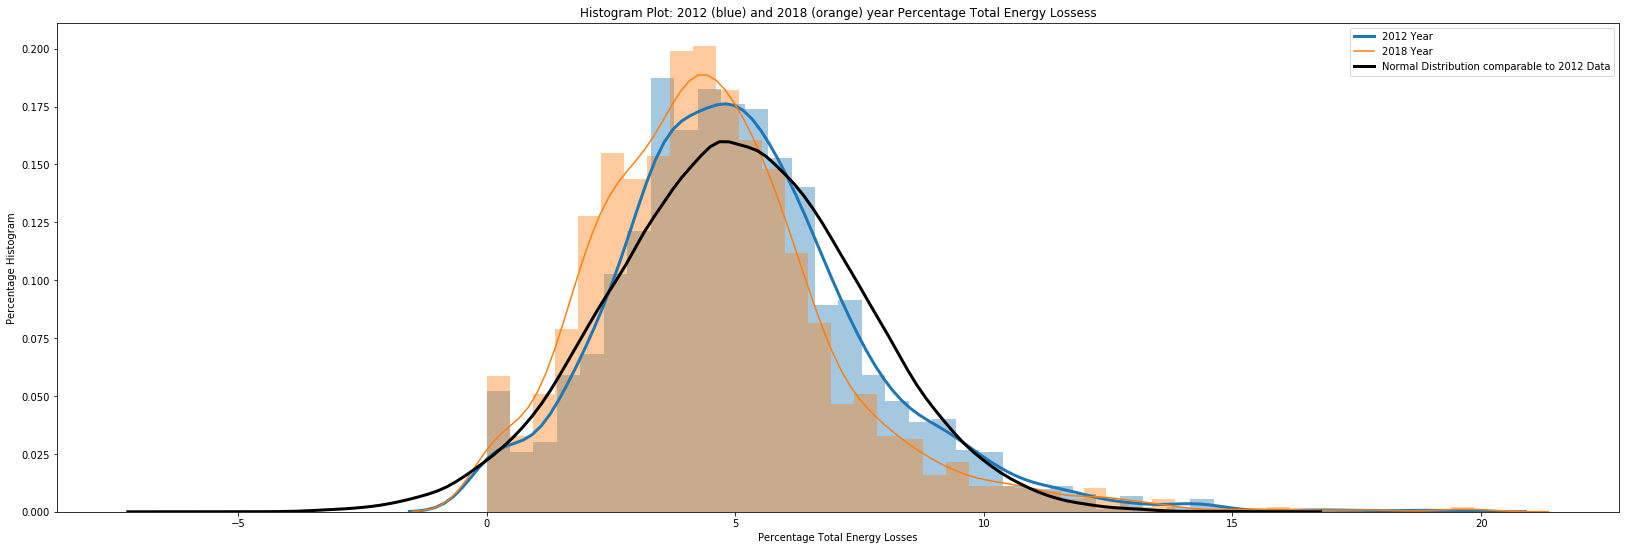

Applying Shapiro-Wilk Test for Normality for PTEL 2012
(0.9638516306877136, 2.0954775010730484e-21)
Applying Shapiro-Wilk Test for Normality for PTEL 2018
(0.9315763711929321, 9.128332564824612e-29)


In [0]:
#energyloss_2012_df.fillna(0)
print("Statistics without limiting data (2012 year)")
print(stats.describe(energyloss_2012_df["Percentage_Losses"]))
print("Statistics with % Loss less than 20% (2012 year)")
print(stats.describe(energyloss_2012_df[energyloss_2012_df["Percentage_Losses"] < 20]["Percentage_Losses"]))
print("Statistics with % Loss less than 20% (2018 year)")
print(stats.describe(energyloss_2018_df[energyloss_2018_df["Percentage_Losses"] < 20]["Percentage_Losses"]))


# Statistics of a Normal Distribution with approximately same mean and variance as 2012 year
print("Statistics of a normal distribution sharing approximate similar mean and variance as 2012 year")
values= np.random.normal(5.0,2.5, 100000)
print(stats.describe(values))


# Basic Statistics
print("Describe the basic statistics of 2012 and 2018 total energy loss distribution")
print(energyloss_merged_df[energyloss_merged_df["Percentage_Losses"] < 20].groupby(['Data Year'])["Percentage_Losses"].describe())

# Plotting the histrogram of Percentage Energy Loss from year 2012 ans 2018
plt.figure(figsize = (28,9))
ax = sns.distplot(energyloss_2012_df[energyloss_2012_df["Percentage_Losses"] < 20]["Percentage_Losses"], kde_kws={ "lw" : 3, "label": "2012 Year"})
ax = sns.distplot(energyloss_2018_df[energyloss_2018_df["Percentage_Losses"] < 20]["Percentage_Losses"], kde_kws={ "label": "2018 Year"})
ax = sns.distplot(values, hist = False, kde_kws={"color": "k", "lw": 3, "label": "Normal Distribution comparable to 2012 Data"})
plt.xlabel('Percentage Total Energy Losses')
plt.ylabel('Percentage Histogram')
plt.title('Histogram Plot: 2012 (blue) and 2018 (orange) year Percentage Total Energy Lossess')
plt.show()

# Applying Shapiro-Wilk Test for Normality
print("Applying Shapiro-Wilk Test for Normality for PTEL 2012")
print(stats.shapiro(energyloss_2012_df[energyloss_2012_df["Percentage_Losses"] < 20]["Percentage_Losses"]))
print("Applying Shapiro-Wilk Test for Normality for PTEL 2018")
print(stats.shapiro(energyloss_2018_df[energyloss_2018_df["Percentage_Losses"] < 20]["Percentage_Losses"]))

Plotting the PTEL of 2012 and 2018 in various categories of NERC, ownership type and state wise, the difference is median values is commonly observed. Overall, the 2012 energy losses seems to be more than 2018, however a few cases otherwise show an opposite trend with 2018 energy losses to be higher.

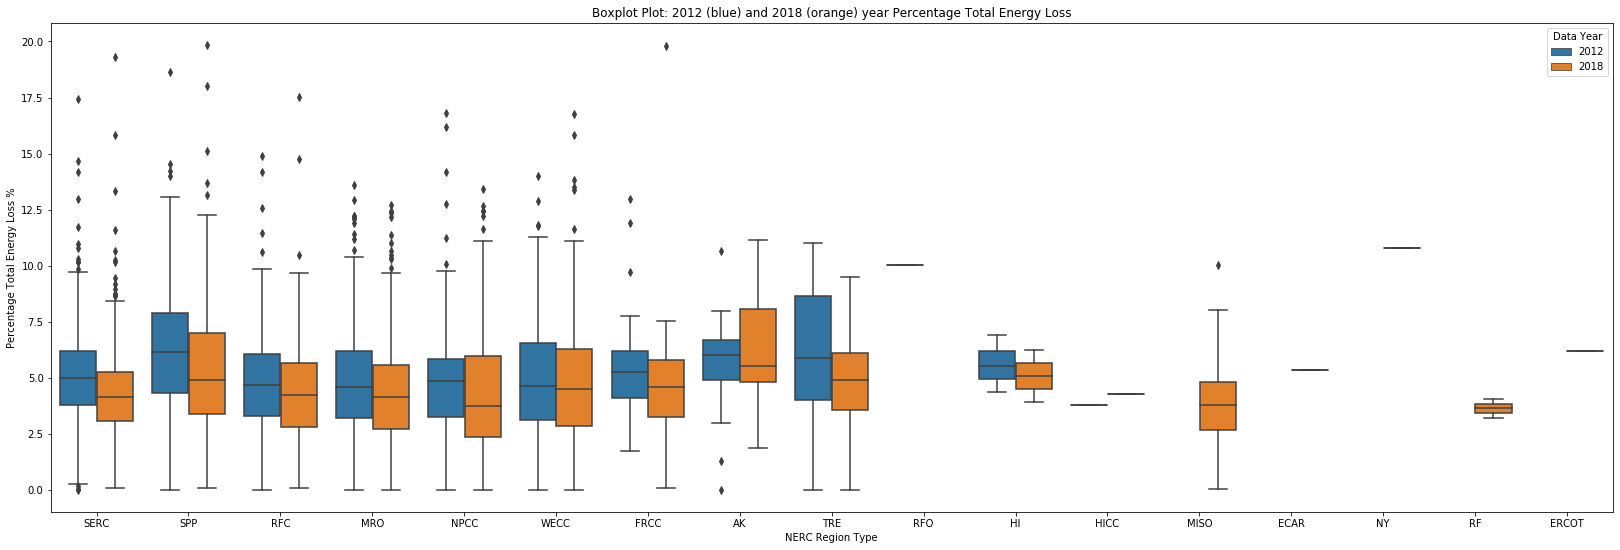

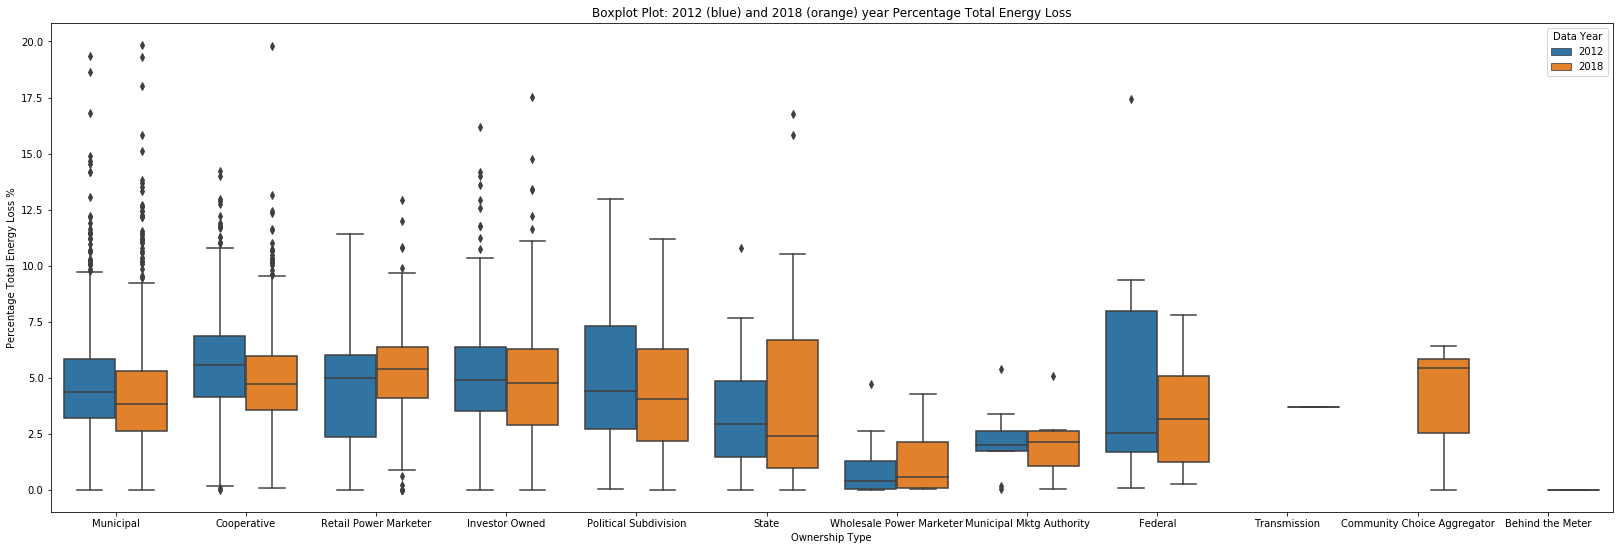

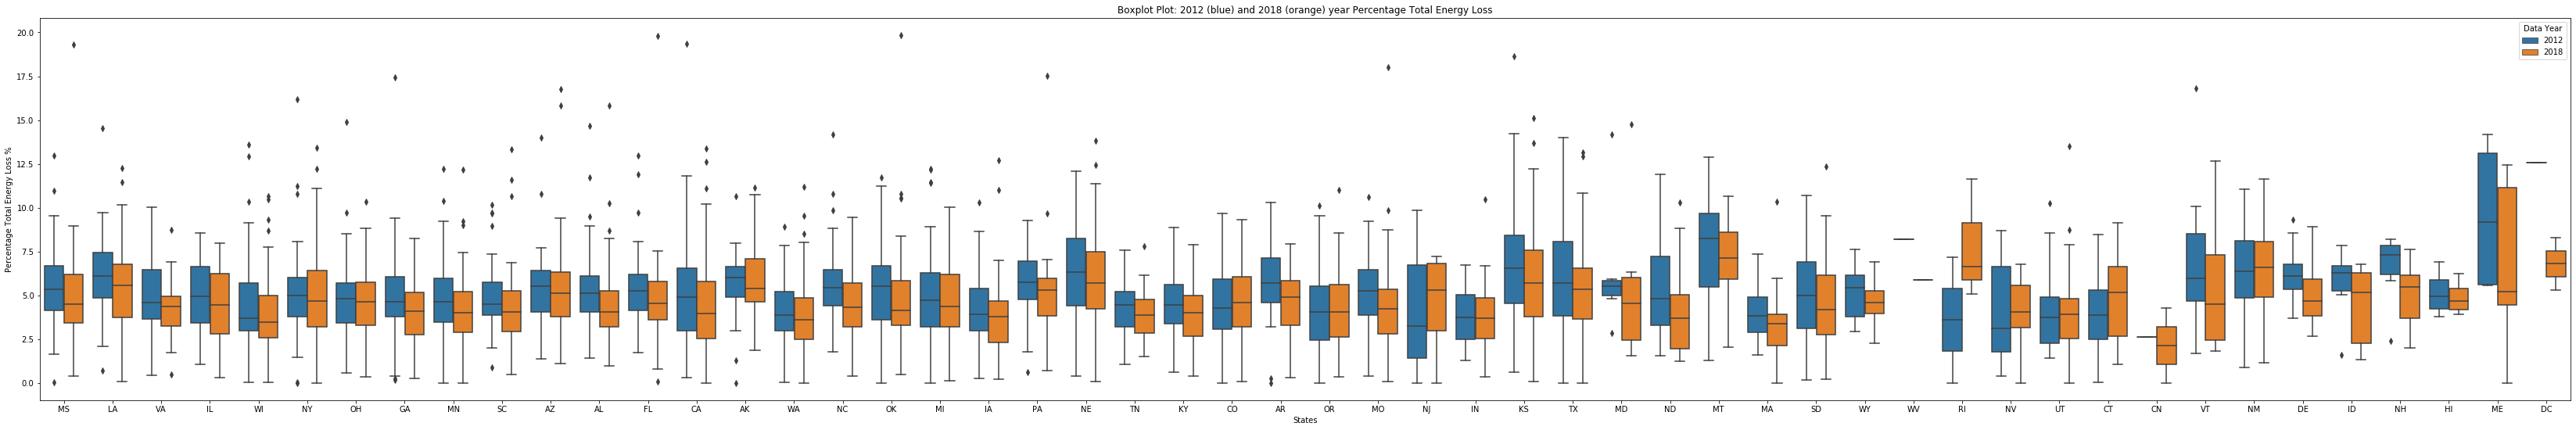

In [0]:
# Plotting the 2012 and 2018 TELP for different categories of Ownership, NERC Region and States
plt.figure(figsize = (28,9))
ax = sns.boxplot(y="Percentage_Losses", hue="Data Year", x="NERC Region",data=energyloss_merged_df[energyloss_merged_df["Percentage_Losses"] < 20])
plt.xlabel('NERC Region Type')
plt.ylabel('Percentage Total Energy Loss %')
plt.title('Boxplot Plot: 2012 (blue) and 2018 (orange) year Percentage Total Energy Loss')
plt.show()

plt.figure(figsize = (28,9))
ax = sns.boxplot(y="Percentage_Losses", hue="Data Year", x="Ownership Type",data=energyloss_merged_df[energyloss_merged_df["Percentage_Losses"] < 20])
plt.xlabel('Ownership Type')
plt.ylabel('Percentage Total Energy Loss %')
plt.title('Boxplot Plot: 2012 (blue) and 2018 (orange) year Percentage Total Energy Loss')
plt.show()

plt.figure(figsize = (58,9))
ax = sns.boxplot(y="Percentage_Losses", hue="Data Year", x="State",data=energyloss_merged_df[energyloss_merged_df["Percentage_Losses"] < 20])
plt.xlabel('States')
plt.ylabel('Percentage Total Energy Loss %')
plt.title('Boxplot Plot: 2012 (blue) and 2018 (orange) year Percentage Total Energy Loss')
plt.show()

To test the difference in the mean energy loss percentage between 2012 and 2018 year, we perform the **t-test of independent sample** under the following assumptions:

1. The test variable (TELP) is continuously distributed as can been seen from histrogram and boxplots
2. The TELP measurements from 2012 and 2018 are independent and uncorrelated
3. The samples are representative of the population as the sample itself contains all the listed power utility entities of North America
4. The TELP distribution are normally distributed (proved above)
5. Variances of TLEP of 2012 and 2018 year are approximately equal

The t-test yields a t value of 6.510 with a p value of small value of ~ 8.5e10^-11. Hence, the null hypothesis is statistically rejected and its is inferred that the mean reduction of 6.5% of total energy losses is observed in the year 2018.

We may also infer that since 2012 year, the energy loss management in the power utility sector of North American, in general, has improved. 

In [0]:
# T-Test Statistic independent Test

print(stats.ttest_ind(energyloss_2012_df[energyloss_2012_df["Percentage_Losses"] < 20]["Percentage_Losses"],energyloss_2018_df[energyloss_2018_df["Percentage_Losses"] < 20]["Percentage_Losses"]))

Ttest_indResult(statistic=6.51013756458276, pvalue=8.484531946904217e-11)


### 2b) Retail Sale Per Unit (RSPU Unit:  Dollar per Megawatthours)

---




RSPU or retail sale per unit is calculated as Revenue 'From Retail Sales Trim' / 'Retail Sales'

In [0]:
retail_merged_df = power_summary_merged[(power_summary_merged['Retail Sales'] != '.') & (power_summary_merged['From Retail Sales'] != '.')]
retail_merged_df = retail_merged_df.assign(Retail_Sales_Trim = retail_merged_df['Retail Sales'].str.replace(",", "").astype(float))
retail_merged_df = retail_merged_df.assign(From_Retail_Sales_Trim = retail_merged_df['From Retail Sales'].str.replace(",", "").astype(float))
retail_merged_df = retail_merged_df.assign(RSPU = 1000*retail_merged_df['From_Retail_Sales_Trim']/retail_merged_df['Retail_Sales_Trim'])
retail_merged_df = retail_merged_df[(retail_merged_df['RSPU'].isnull() == False)]
retail_merged_df.head()

,Data Year,Utility Number,Utility Name,State,Ownership Type,NERC Region,Summer Peak Demand,Winter Peak Demand,Net Generation,Wholesale Power Purchases,Exchange Energy Received,Exchange Energy Delivered,Net Power Exchanged,Wheeled Power Received,Wheeled Power Delivered,Net Wheeled Power,Transmission by Other Losses,Total Sources,Retail Sales,Sales for Resale,Furnished without Charge,Consumed by Respondent without Charge,Total Energy Losses,Total Disposition,From Retail Sales,From Delivery Customers,From Sales for Resale,From Credits or Adjustments,From Transmission,From Other,Total,Data Type\nO = Observed\nI = Imputed,Data Type\r\nO = Observed\r\nI = Imputed,Retail_Sales_Trim,From_Retail_Sales_Trim,RSPU
0,2012,55,City of Aberdeen - (MS),MS,Municipal,SERC,30.0,33.0,0,"199,363",.,.,.,.,.,.,.,"199,363","192,494",0,.,38,"6,831","199,363","14,985.0",.,.,0.0,.,221.0,"15,206.0",O,NaN,192494.0,14985.0,77.846582
1,2012,59,City of Abbeville - (LA),LA,Municipal,SPP,34.0,22.0,.,"143,515",.,.,0,.,.,0,.,"143,515","132,321",.,.,.,"11,194","143,515","13,528.0",.,.,.,.,.,"13,528.0",O,NaN,132321.0,13528.0,102.236229
2,2012,84,A & N Electric Coop,VA,Cooperative,RFC,166.9,139.0,"-10,206","679,406",0,0,0,0,0,0,0,"669,200","649,817",0,0,"1,073","18,310","669,200","70,115.7",0.0,0.0,.,0.0,.,"70,115.7",O,NaN,649817.0,70115.7,107.900686
3,2012,97,Adams Electric Coop,IL,Cooperative,SERC,38.6,31.8,"5,040","166,900",.,.,0,.,.,0,.,"171,940","159,105",.,.,329,"12,506","171,940","19,875.0",.,.,.,.,230.0,"20,105.0",O,NaN,159105.0,19875.0,124.917507
4,2012,108,Adams-Columbia Electric Coop,WI,Cooperative,MRO,149.1,81.1,.,"524,397",.,.,0,.,.,0,.,"524,397","491,010",78,.,"1,084","32,225","524,397","58,880.0",.,5.0,.,.,565.0,"59,450.0",O,NaN,491010.0,58880.0,119.916091


In similar fashion to our previous analysis on TELP, I check the RSPU distribution of 2012 year. By limiting the RSPU sample to below $200/MWh (discarding extreme outlier values, 0.95% data point) the skewness and kurtosis values are reduced. Hence the RSPU distribution is taken to be normal.

Statistics of RSPU without limiting data (2012 year)
DescribeResult(nobs=1996, minmax=(19.998712679487625, 577.4785007301639), mean=101.78988672745861, variance=1391.1477127561443, skewness=5.087924687591232, kurtosis=49.72273667534236)
Statistics with RSPU less than $200/MWh  (2012 year)
DescribeResult(nobs=1977, minmax=(19.998712679487625, 196.6254148444527), mean=99.26190968507626, variance=623.6447653559447, skewness=0.20860903353849233, kurtosis=0.7473526276122708)
Statistics with RSPU less than $200/MWh  (2018 year)
DescribeResult(nobs=2092, minmax=(7.661681594438988, 197.2323646236372), mean=104.72660807295665, variance=701.9537967837452, skewness=0.13958455721768603, kurtosis=0.9598473407219275)
Statistics of a normal distribution sharing approximate similar mean and variance as 2012 year
DescribeResult(nobs=100000, minmax=(-11.584125647299913, 213.51801450687213), mean=100.0676528064432, variance=627.490579395657, skewness=0.004423911941975485, kurtosis=0.009301350840221989)


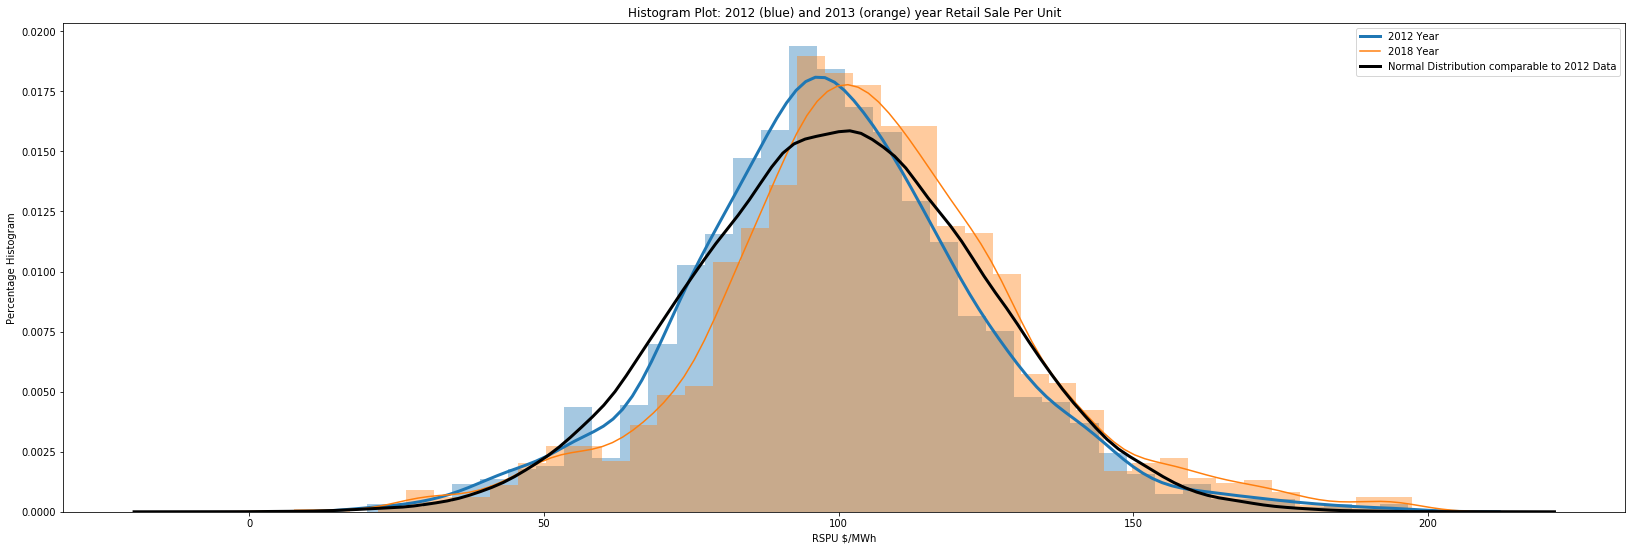

Applying Shapiro-Wilk Test for Normality for RSPU 2012
(0.9920864701271057, 7.2779906545861195e-09)
Applying Shapiro-Wilk Test for Normality for RSPU 2018
(0.9873939752578735, 1.3191064993783863e-12)


In [0]:
print("Statistics of RSPU without limiting data (2012 year)")
print(stats.describe(retail_merged_df[retail_merged_df['Data Year'] == 2012]['RSPU']))
print("Statistics with RSPU less than $200/MWh  (2012 year)")
print(stats.describe(retail_merged_df[(retail_merged_df['Data Year'] == 2012) & (retail_merged_df['RSPU'] <= 200)]['RSPU']))
print("Statistics with RSPU less than $200/MWh  (2018 year)")
print(stats.describe(retail_merged_df[(retail_merged_df['Data Year'] == 2018) & (retail_merged_df['RSPU'] <= 200)]['RSPU']))


# Statistics of a Normal Distribution with approximately same mean and variance as 2012 year
print("Statistics of a normal distribution sharing approximate similar mean and variance as 2012 year")
values= np.random.normal(100.0,25, 100000)
print(stats.describe(values))

# Plotting the histrogram of Percentage Energy Loss from year 2012 ans 2018
plt.figure(figsize = (28,9))
ax = sns.distplot(retail_merged_df[(retail_merged_df['Data Year'] == 2012) & (retail_merged_df['RSPU'] <= 200)]['RSPU'], kde_kws={ "lw" : 3, "label": "2012 Year"})
ax = sns.distplot(retail_merged_df[(retail_merged_df['Data Year'] == 2018) & (retail_merged_df['RSPU'] <= 200)]['RSPU'], kde_kws={ "label": "2018 Year"})
ax = sns.distplot(values, hist = False, kde_kws={"color": "k", "lw": 3, "label": "Normal Distribution comparable to 2012 Data"})
plt.xlabel('RSPU $/MWh')
plt.ylabel('Percentage Histogram')
plt.title('Histogram Plot: 2012 (blue) and 2013 (orange) year Retail Sale Per Unit')
plt.show()

# Applying Shapiro-Wilk Test for Normality
print("Applying Shapiro-Wilk Test for Normality for RSPU 2012")
print(stats.shapiro(retail_merged_df[(retail_merged_df['Data Year'] == 2012) & (retail_merged_df['RSPU'] <= 200)]['RSPU']))
print("Applying Shapiro-Wilk Test for Normality for RSPU 2018")
print(stats.shapiro(retail_merged_df[(retail_merged_df['Data Year'] == 2018) & (retail_merged_df['RSPU'] <= 200)]['RSPU']))

Plotting the RSPU of 2012 and 2018 in various categories of NERC, ownership type and state wise, the median value of 2018 year appear to be higher than 2012 for almost all sub categories.

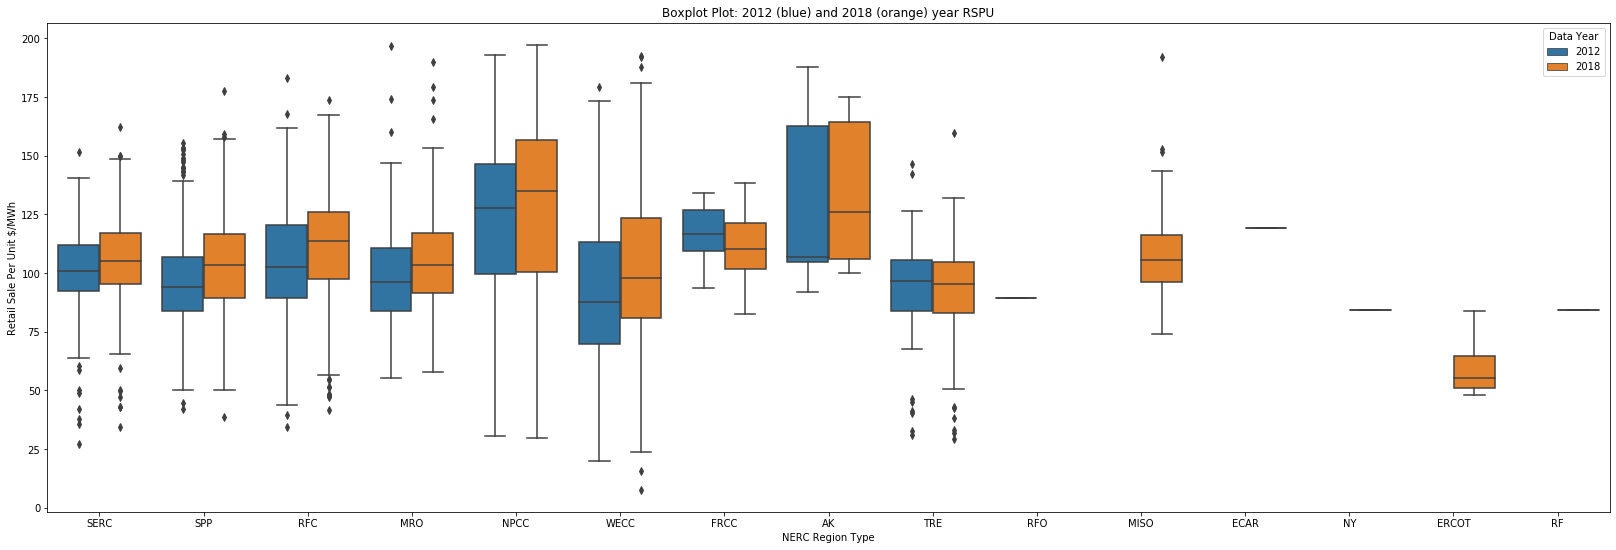

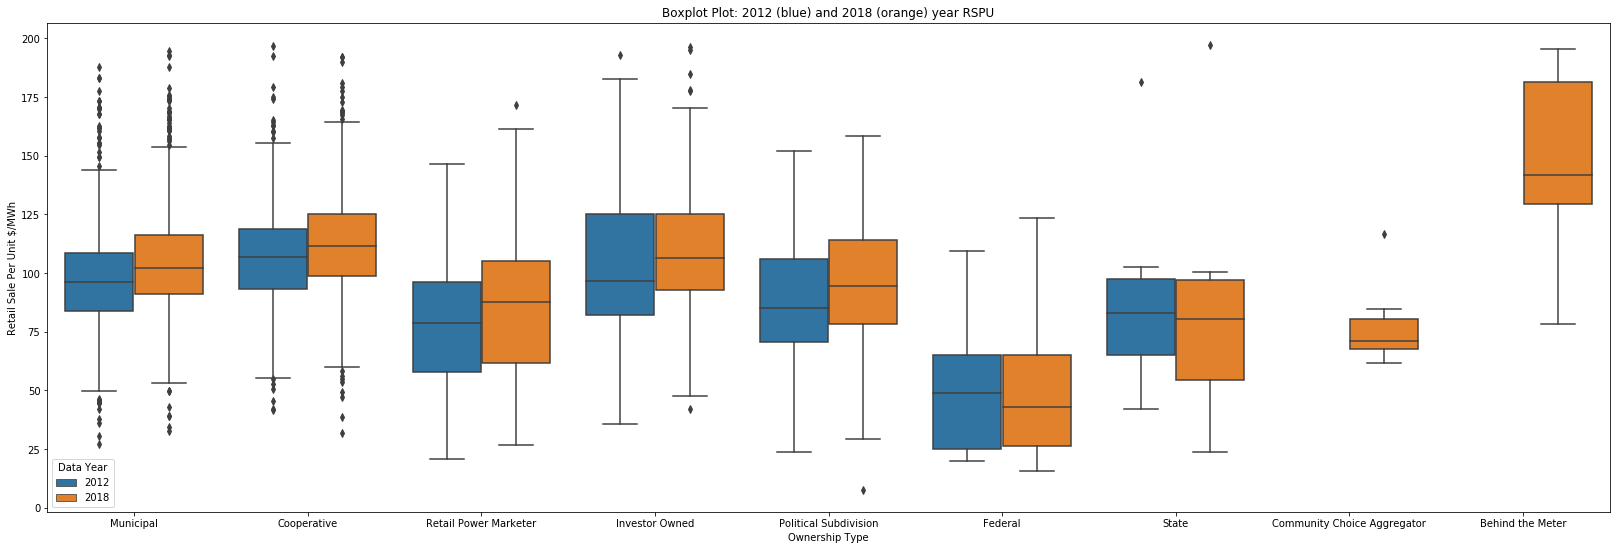

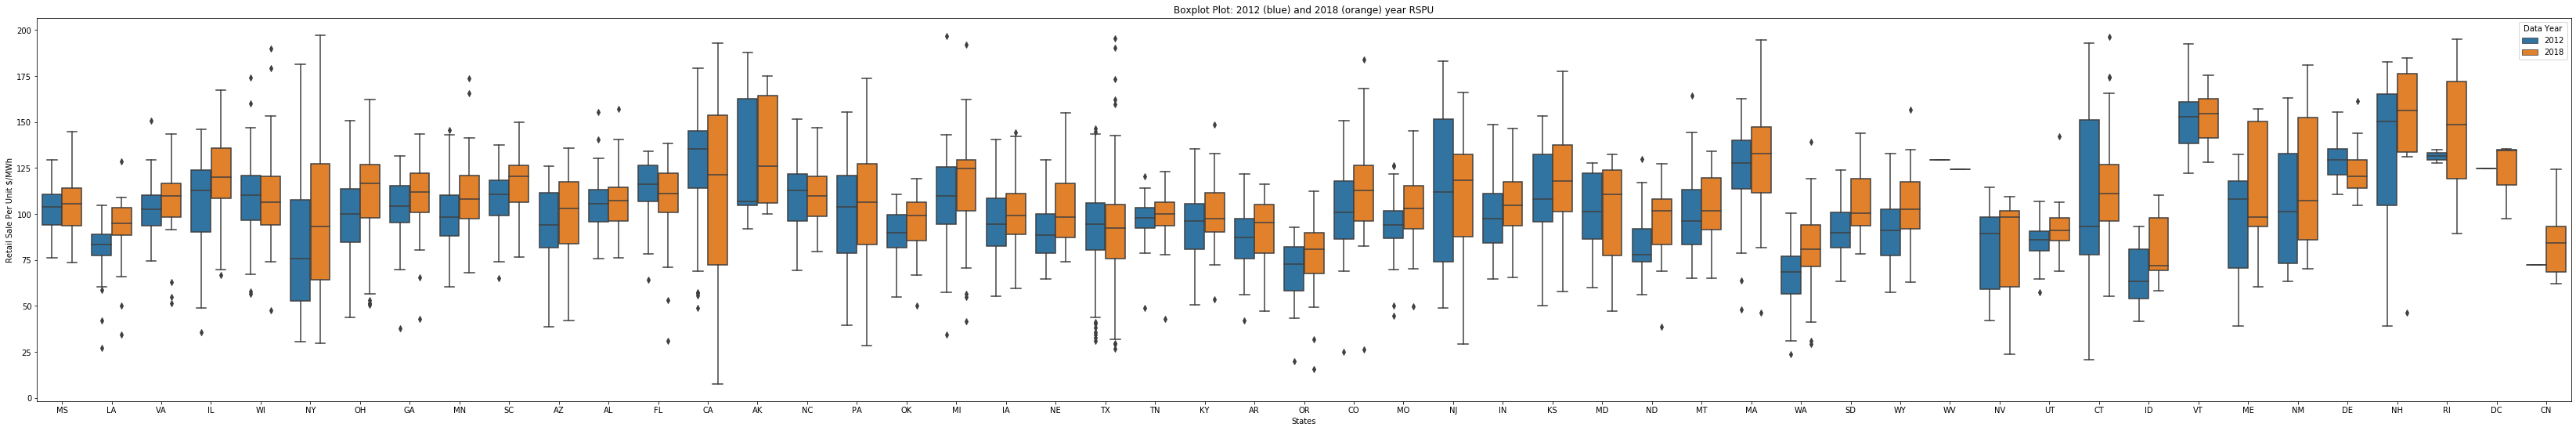

In [0]:
plt.figure(figsize = (28,9))
ax = sns.boxplot(y="RSPU", hue="Data Year", x="NERC Region",data=retail_merged_df[(retail_merged_df['RSPU'] <= 200)])
plt.xlabel('NERC Region Type')
plt.ylabel('Retail Sale Per Unit $/MWh')
plt.title('Boxplot Plot: 2012 (blue) and 2018 (orange) year RSPU')
plt.show()

plt.figure(figsize = (28,9))
ax = sns.boxplot(y="RSPU", hue="Data Year", x="Ownership Type",data=retail_merged_df[(retail_merged_df['RSPU'] <= 200)])
plt.xlabel('Ownership Type')
plt.ylabel('Retail Sale Per Unit $/MWh')
plt.title('Boxplot Plot: 2012 (blue) and 2018 (orange) year RSPU')
plt.show()

plt.figure(figsize = (58,9))
ax = sns.boxplot(y="RSPU", hue="Data Year", x="State",data=retail_merged_df[(retail_merged_df['RSPU'] <= 200)])
plt.xlabel('States')
plt.ylabel('Retail Sale Per Unit $/MWh')
plt.title('Boxplot Plot: 2012 (blue) and 2018 (orange) year RSPU')
plt.show()

Under the same assumptiona of t-test, the t value of -6.76165 is obtained with a p value of the order 10^-11. The null hypothesis is statistically rejected.

The overall trend and t value indicate a the mean increase in revenue of $6.76 per Megawatthour of energy supplied in 2018 from 2012.

In [0]:
# T-Test Statistic independent Test
print(stats.ttest_ind(retail_merged_df[(retail_merged_df['Data Year'] == 2012) & (retail_merged_df['RSPU'] <= 200)]['RSPU'],retail_merged_df[(retail_merged_df['Data Year'] == 2018) & (retail_merged_df['RSPU'] <= 200)]['RSPU']))

Ttest_indResult(statistic=-6.761656274532337, pvalue=1.558409084552399e-11)


### 2c) Total Energy Delivered

---






In this testing, I check for the changes in the total energy supply between 2012 and 2018 year.

In [0]:
source_merged_df = power_summary_merged[(power_summary_merged['Total Sources'] != '.')]
source_merged_df = source_merged_df.assign(Total_Sources_Trim = source_merged_df['Total Sources'].str.replace(",", "").astype(float))
source_merged_df = source_merged_df[(source_merged_df['Total_Sources_Trim'].isnull() == False)]
source_merged_df.head()

,Data Year,Utility Number,Utility Name,State,Ownership Type,NERC Region,Summer Peak Demand,Winter Peak Demand,Net Generation,Wholesale Power Purchases,Exchange Energy Received,Exchange Energy Delivered,Net Power Exchanged,Wheeled Power Received,Wheeled Power Delivered,Net Wheeled Power,Transmission by Other Losses,Total Sources,Retail Sales,Sales for Resale,Furnished without Charge,Consumed by Respondent without Charge,Total Energy Losses,Total Disposition,From Retail Sales,From Delivery Customers,From Sales for Resale,From Credits or Adjustments,From Transmission,From Other,Total,Data Type\nO = Observed\nI = Imputed,Data Type\r\nO = Observed\r\nI = Imputed,Total_Sources_Trim
0,2012,55,City of Aberdeen - (MS),MS,Municipal,SERC,30.0,33.0,0,"199,363",.,.,.,.,.,.,.,"199,363","192,494",0,.,38,"6,831","199,363","14,985.0",.,.,0.0,.,221.0,"15,206.0",O,NaN,199363.0
1,2012,59,City of Abbeville - (LA),LA,Municipal,SPP,34.0,22.0,.,"143,515",.,.,0,.,.,0,.,"143,515","132,321",.,.,.,"11,194","143,515","13,528.0",.,.,.,.,.,"13,528.0",O,NaN,143515.0
2,2012,84,A & N Electric Coop,VA,Cooperative,RFC,166.9,139.0,"-10,206","679,406",0,0,0,0,0,0,0,"669,200","649,817",0,0,"1,073","18,310","669,200","70,115.7",0.0,0.0,.,0.0,.,"70,115.7",O,NaN,669200.0
3,2012,97,Adams Electric Coop,IL,Cooperative,SERC,38.6,31.8,"5,040","166,900",.,.,0,.,.,0,.,"171,940","159,105",.,.,329,"12,506","171,940","19,875.0",.,.,.,.,230.0,"20,105.0",O,NaN,171940.0
4,2012,108,Adams-Columbia Electric Coop,WI,Cooperative,MRO,149.1,81.1,.,"524,397",.,.,0,.,.,0,.,"524,397","491,010",78,.,"1,084","32,225","524,397","58,880.0",.,5.0,.,.,565.0,"59,450.0",O,NaN,524397.0


To check for the distribution characteristic, I plot the  histogram of 2012 year without applying any limit to the data, which gives a high variance, skewness and kurtosis values. The overall mean value is also high (approx 3.4 million MWh).

On applying the limit to total sources less than 10 million MWH (discarding roughly 7.2% of datapoints), the kurtosis and skewness values are reduced but is still relatively high for a bell curve distribution. Histogram and mean/variance statistics also suggest the distribution is positively skewed.

Statistics of Total Sources without limiting data (2012 year)
DescribeResult(nobs=2176, minmax=(0.0, 230578337.0), mean=3427139.2486213236, variance=191158670476158.9, skewness=8.83119739557292, kurtosis=102.86728255090651)
Statistics with Total Sources less than 10 million MWh  (2012 year)
DescribeResult(nobs=2019, minmax=(0.0, 9956460.0), mean=810845.5780089153, variance=2213070709534.848, skewness=3.510072686794482, kurtosis=13.564145054120768)
Statistics with Total Sources less than 10 million MWh  (2018 year)
DescribeResult(nobs=2133, minmax=(0.0, 9494310.0), mean=822283.5621190812, variance=2132856609173.2388, skewness=3.3122409452063724, kurtosis=11.829339308744544)


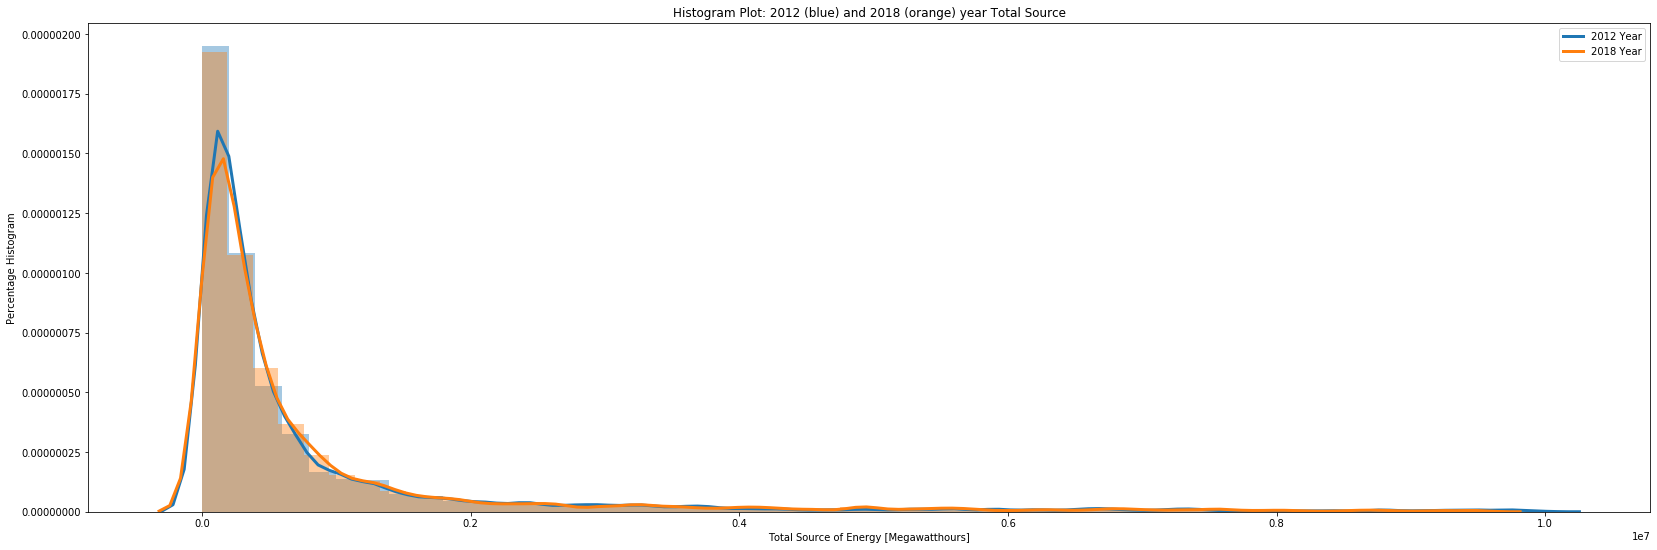

In [0]:
print("Statistics of Total Sources without limiting data (2012 year)")
print(stats.describe(source_merged_df[source_merged_df['Data Year'] == 2012]['Total_Sources_Trim']))
print("Statistics with Total Sources less than 10 million MWh  (2012 year)")
print(stats.describe(source_merged_df[(source_merged_df['Data Year'] == 2012) & (source_merged_df['Total_Sources_Trim'] <= 10000000)]['Total_Sources_Trim']))
print("Statistics with Total Sources less than 10 million MWh  (2018 year)")
print(stats.describe(source_merged_df[(source_merged_df['Data Year'] == 2018) & (source_merged_df['Total_Sources_Trim'] <= 10000000)]['Total_Sources_Trim']))

# Plotting the histrogram of Percentage Energy Loss from year 2012 ans 2018
plt.figure(figsize = (28,9))
ax = sns.distplot(source_merged_df[(source_merged_df['Data Year'] == 2012) &  (source_merged_df['Total_Sources_Trim'] <= 10000000)]['Total_Sources_Trim'], kde_kws={ "lw" : 3, "label": "2012 Year"})
ax = sns.distplot(source_merged_df[(source_merged_df['Data Year'] == 2018) &  (source_merged_df['Total_Sources_Trim'] <= 10000000)]['Total_Sources_Trim'], kde_kws={ "lw" : 3, "label": "2018 Year"})
plt.xlabel('Total Source of Energy [Megawatthours]')
plt.ylabel('Percentage Histogram')
plt.title('Histogram Plot: 2012 (blue) and 2018 (orange) year Total Source')
plt.show()

From the boxplot under the various categories, I observe no common trend  in the differences of the median of 2012 and 2018 distribution. I also observe many data point plotted as outliers, which may indicate a highly skewed distribution. 

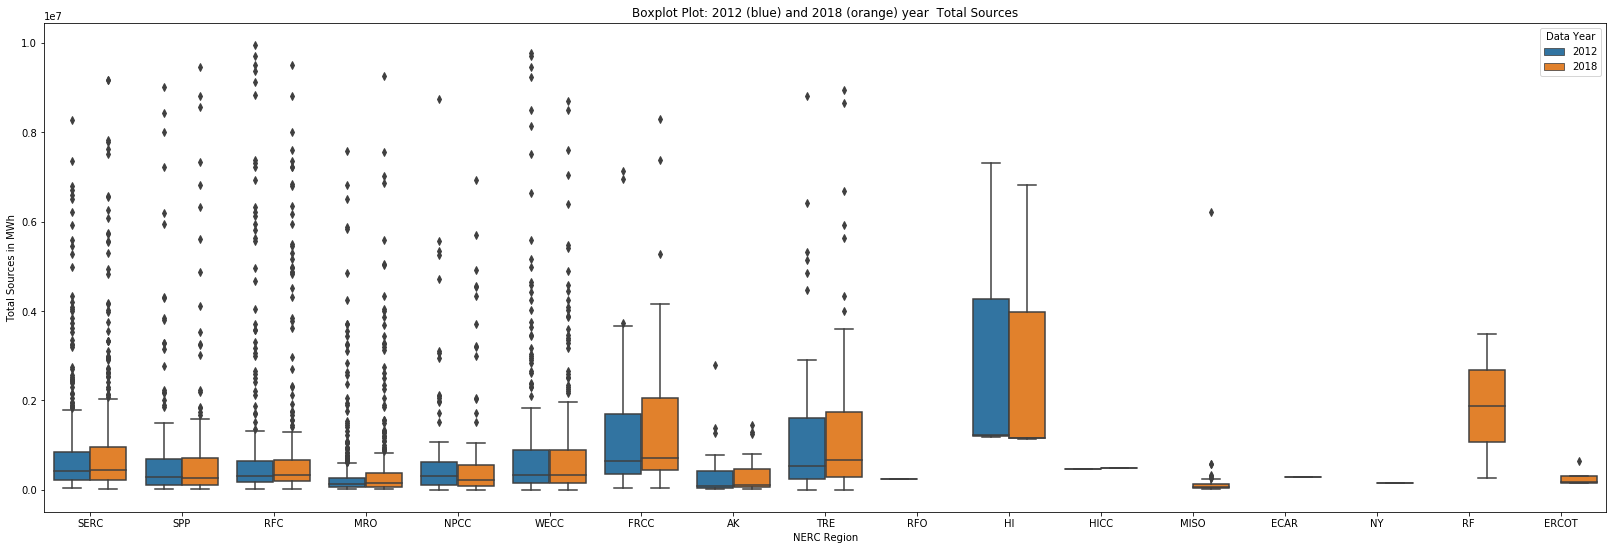

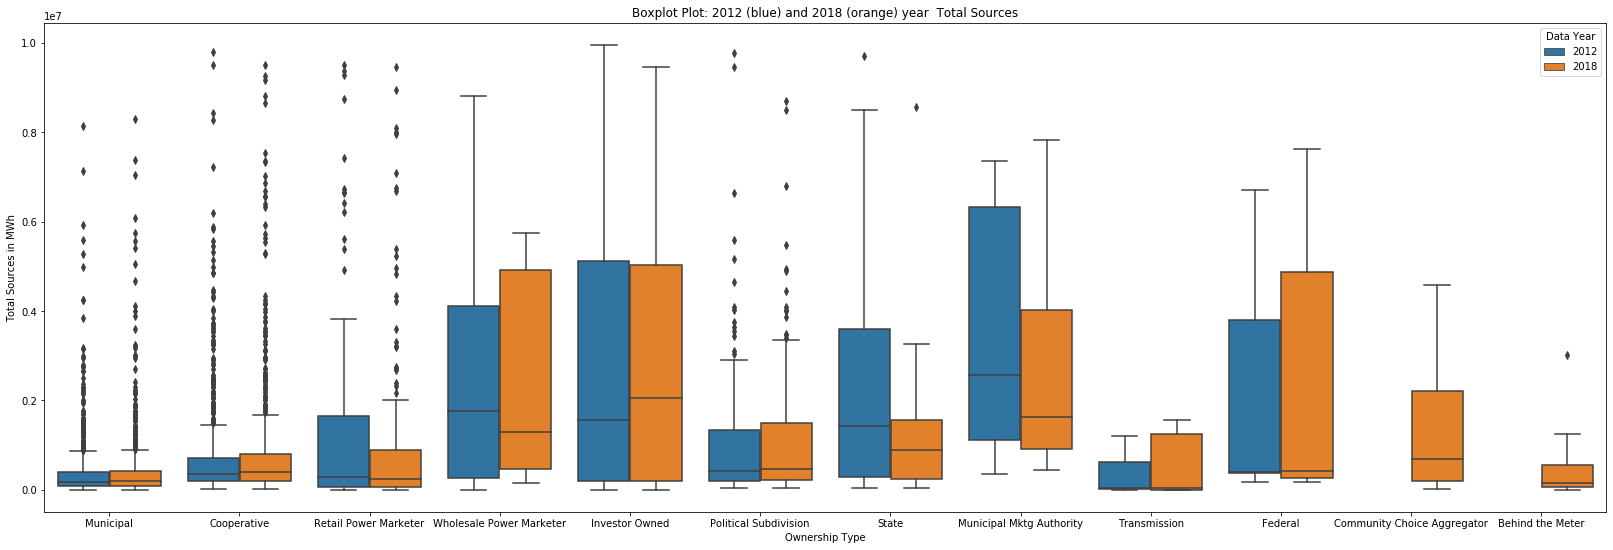

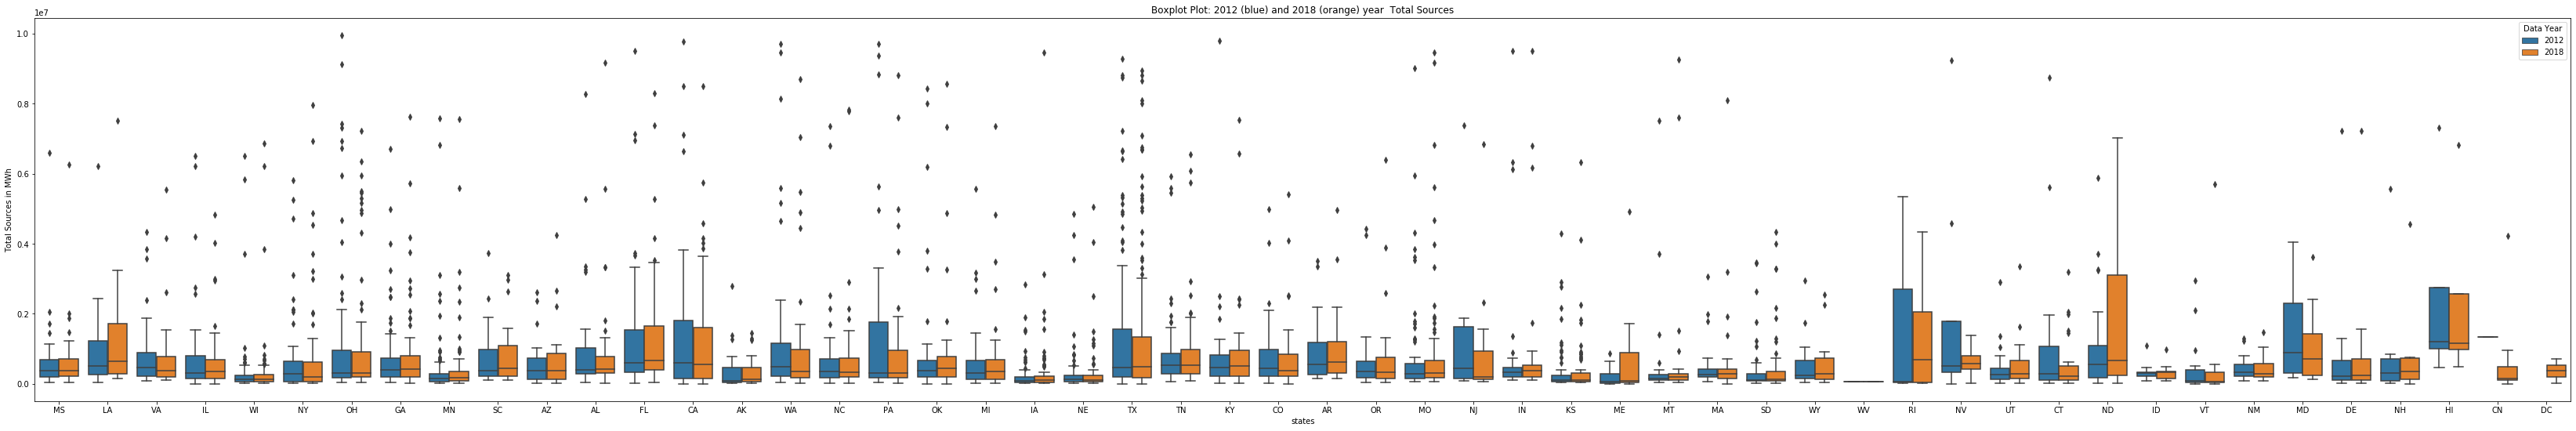

In [0]:
plt.figure(figsize = (28,9))
ax = sns.boxplot(y="Total_Sources_Trim", hue="Data Year", x='NERC Region',data=source_merged_df[source_merged_df['Total_Sources_Trim'] < 10000000])
plt.xlabel('NERC Region')
plt.ylabel('Total Sources in MWh')
plt.title('Boxplot Plot: 2012 (blue) and 2018 (orange) year  Total Sources')
plt.show()

plt.figure(figsize = (28,9))
ax = sns.boxplot(y="Total_Sources_Trim", hue="Data Year", x='Ownership Type',data=source_merged_df[source_merged_df['Total_Sources_Trim'] < 10000000])
plt.xlabel('Ownership Type')
plt.ylabel('Total Sources in MWh')
plt.title('Boxplot Plot: 2012 (blue) and 2018 (orange) year  Total Sources')
plt.show()

plt.figure(figsize = (58,9))
ax = sns.boxplot(y="Total_Sources_Trim", hue="Data Year", x='State',data=source_merged_df[source_merged_df['Total_Sources_Trim'] < 10000000])
plt.xlabel('states')
plt.ylabel('Total Sources in MWh')
plt.title('Boxplot Plot: 2012 (blue) and 2018 (orange) year  Total Sources')
plt.show()

Based on the observation above, I now test for a hypothesis of a significant difference in the 2012 and 2018 year using **Kruskal-Wallis** test for non-normal distribution. I test it under the condition 1) with total source limit of 10 million MWh applied and 2) without any limit applied.

For both cases, I get a higher p value of 0.55 and 0.84 which fails to reject the null hypothesis of the two distribution having significant difference.

In [0]:
print("Krushal Wallist Test on Total Sources less than 10 million MWh")
print(stats.kruskal(source_merged_df[(source_merged_df['Total_Sources_Trim'] < 10000000) & (source_merged_df['Data Year'] == 2012)]['Total_Sources_Trim'],source_merged_df[(source_merged_df['Total_Sources_Trim'] < 10000000) & (source_merged_df['Data Year'] == 2018)]['Total_Sources_Trim']))
print("Krushal Wallist Test on Total Sources without data limit")
print(stats.kruskal(source_merged_df[(source_merged_df['Data Year'] == 2012)]['Total_Sources_Trim'],source_merged_df[(source_merged_df['Data Year'] == 2018)]['Total_Sources_Trim']))

Krushal Wallist Test on Total Sources less than 10 million MWh
KruskalResult(statistic=0.3649106049279364, pvalue=0.5457915791134449)
Krushal Wallist Test on Total Sources without data limit
KruskalResult(statistic=0.04031627292559592, pvalue=0.8408634663496783)


Hence, it is shown that the total sources or the total amount of electricity supplied by the power utilities entities in the entire North America has not significantly changed from 2012 to 2018.



## Discussions and Recommendation
---

From the tests, we find that the summer peak load and winter peak load do not differ significantly for 2018. A followup investigation could be to determine any correlation between the two and to apply machine learning using the sampled yearly data to predict the future peak loads.


The test carried above are also relevant in understanding how has the power sector performed since 2012 in selected key parameters. 
This is important to understand the energy requirements of the country and also highlights any known trends (like Total Energy Losses) than can help in accurately predicting  future energy demand.